In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
df=pd.read_csv('centroid_data.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94532 entries, 0 to 94531
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            94532 non-null  object 
 1   Company         94532 non-null  object 
 2   year            94532 non-null  int64  
 3   adda_Label      94532 non-null  object 
 4   sim_score       94532 non-null  float64
 5   centroid_label  94532 non-null  object 
 6   centroid_score  94532 non-null  float64
 7   Formness_score  94532 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.5+ MB


In [4]:
df.head()

,text,Company,year,adda_Label,sim_score,centroid_label,centroid_score,Formness_score
0,Augmented reality makes the fascination of Por...,Porsche,2016,E1,0.721638,S3,0.820336,0.671054
1,The second volume is called Performance and co...,Porsche,2016,E1,0.797681,S4,0.857972,0.474855
2,"For the first time, Porsche has published a co...",Porsche,2016,E1,0.781439,S4,0.863545,0.600305
3,"Over the course of the last financial year, Po...",Porsche,2016,G1,0.746018,S4,0.843645,0.455402
4,power of new technology. New variants of the 9...,Porsche,2016,E1,0.752404,E4,0.827516,0.439552


In [6]:
cohen_kappa_score(df.adda_Label,df.centroid_label)

0.31716768056737665

In [8]:
accuracy_score(df.adda_Label,df.centroid_label)

0.38439893369441036

In [9]:
df['agreement'] = (df['adda_Label']==df['centroid_label']).astype(int)

In [10]:
df.head()

,text,Company,year,adda_Label,sim_score,centroid_label,centroid_score,Formness_score,agreement
0,Augmented reality makes the fascination of Por...,Porsche,2016,E1,0.721638,S3,0.820336,0.671054,0
1,The second volume is called Performance and co...,Porsche,2016,E1,0.797681,S4,0.857972,0.474855,0
2,"For the first time, Porsche has published a co...",Porsche,2016,E1,0.781439,S4,0.863545,0.600305,0
3,"Over the course of the last financial year, Po...",Porsche,2016,G1,0.746018,S4,0.843645,0.455402,0
4,power of new technology. New variants of the 9...,Porsche,2016,E1,0.752404,E4,0.827516,0.439552,0


In [11]:
accuracy_score(df[df["centroid_score"]>0.9].adda_Label,df[df["centroid_score"]>0.9].centroid_label)

0.7459493804934872

In [12]:
accuracy_score(df[df["sim_score"]>0.82].adda_Label,df[df["sim_score"]>0.82].centroid_label)

0.8646353646353646

In [13]:
len(df[df["centroid_score"]>0.9])

9443

In [14]:
len(df[df["sim_score"]>0.82])


8008

<Axes: >

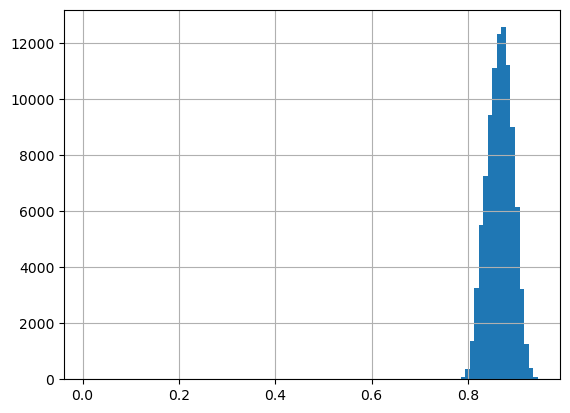

In [15]:
df["centroid_score"].hist(bins=100)

<Axes: >

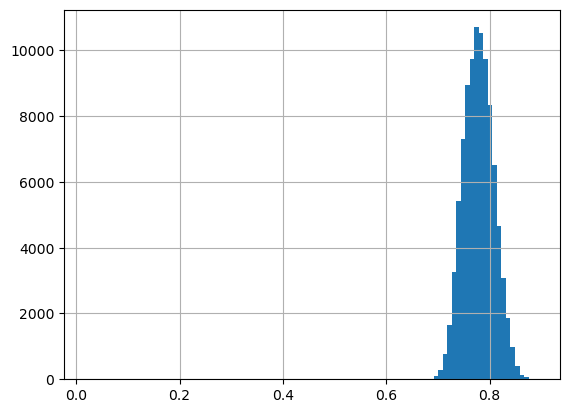

In [16]:
df["sim_score"].hist(bins=100)

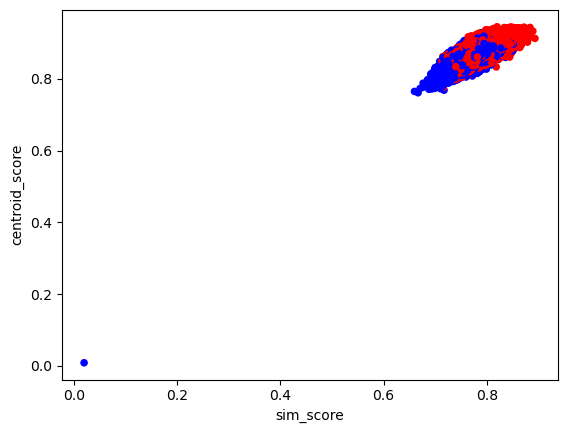

In [18]:
colors = {0: 'blue', 1: 'red'}
ax1 = df.plot.scatter(x='sim_score',y='centroid_score',c=df.agreement.map(colors))

In [19]:
df[df["centroid_score"]<0.2]

,text,Company,year,adda_Label,sim_score,centroid_label,centroid_score,Formness_score,agreement
64415,Within the framework of our sustainability man...,Mercedes-Benz,2015,E2,0.019831,S3,0.008509,0.603823,0


In [20]:
df.at[64415,"text"]

'Within the framework of our sustainability management system, we steer our sustainability program in a manner that enables us to verify the imple- mentation of its objectives and thus ensure continuous improvement. Our management and organizational structures support this process by establishing clear lines of responsibility in all business divisions. Our sustainability objectives and their management are central components of our corporate governance system and are also incorporated into the target agreements between employees and managers.'

(0.6, 1.0)

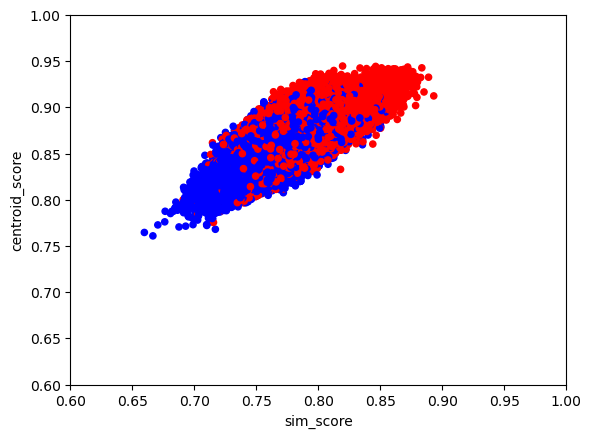

In [21]:
ax = df.plot.scatter(x='sim_score',y='centroid_score',c=df.agreement.map(colors))
ax.set_xlim(0.6,1)
ax.set_ylim(0.6,1)


(0.6, 1.0)

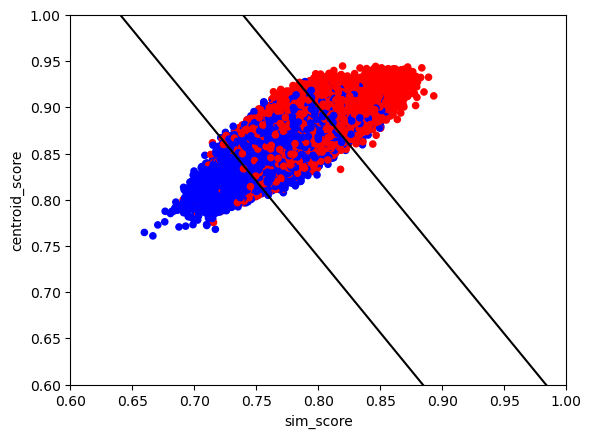

In [22]:
ax = df.plot.scatter(x='sim_score',y='centroid_score',c=df.agreement.map(colors))
ax.plot([0, 1.35], [2.21, 0], c="black")
ax.plot([0, 1.25], [2.05, 0], c="black")
ax.set_xlim(0.6,1)
ax.set_ylim(0.6,1)


In [23]:
top_df=df[df["sim_score"]*1.637+df["centroid_score"] > 2.21]
mid_df=df[(df["sim_score"]*1.637+df["centroid_score"]> 2.05) & (df["sim_score"]*1.637+df["centroid_score"]<= 2.21)]
low_df=df[df["sim_score"]*1.637+df["centroid_score"] <= 2.04]

In [25]:
print("Top data proportion",len(top_df)/len(df))
print("Mid data proportion",len(mid_df)/len(df))
print("Low data proportion",len(low_df)/len(df))

Top data proportion 0.1768819024245758
Mid data proportion 0.7197562730080819
Low data proportion 0.07631278297296154


## Top Section

In [26]:
top_df.head()

,text,Company,year,adda_Label,sim_score,centroid_label,centroid_score,Formness_score,agreement
41,Adherence to the law and legislation is ensure...,Porsche,2016,G1,0.810355,G1,0.888212,0.433867,1
42,Porsches compliance programme comprises a rang...,Porsche,2016,G1,0.825220,G1,0.888968,0.585818,1
43,The compliance code summarises the most import...,Porsche,2016,G1,0.839349,G1,0.924060,0.823286,1
44,"As a main measure of response, an internal and...",Porsche,2016,G1,0.816739,G1,0.893480,0.647341,1
46,Trustworthy cooperation and common values are ...,Porsche,2016,G1,0.826012,G1,0.896600,0.410629,1


In [27]:
top_df.agreement.mean()

0.7536630584295197

In [28]:
top_df.groupby("adda_Label")["text"].count()

adda_Label
E1    5518
E2     228
E3     324
E4     250
E5     434
G1    4624
S1    3736
S2    1090
S3     115
S4     402
Name: text, dtype: int64

In [29]:
top_df.groupby("centroid_label")["text"].count()

centroid_label
E1    4599
E2     499
E3     390
E4     323
E5     767
G1    3565
S1    3609
S3     358
S4    2611
Name: text, dtype: int64

S2 label missing from centroid labels

In [30]:
top_df[top_df["centroid_label"]==top_df["adda_Label"]].groupby("adda_Label")["text"].count()

adda_Label
E1    4580
E2     190
E3     312
E4     232
E5     418
G1    3246
S1    3203
S3      88
S4     333
Name: text, dtype: int64

In [31]:
top_df[top_df["adda_Label"]=="S2"].groupby("centroid_label")["text"].count()

centroid_label
E1      9
E2     66
E3     12
E4     17
E5     74
G1     94
S1    222
S3     41
S4    555
Name: text, dtype: int64

In [32]:
#df_S2_adda=top_df[top_df["adda_Label"]=="S2"].sample(100)
#df_S2_adda["text"]=df_S2_adda["text"].apply(insert_newlines)
#df_S2_adda.to_csv("Adda_S2_top.csv",columns=["text","centroid_label"])

After looking at 100 random samples we can deduce that data labeled S1 with ada_label and S2 with centroid is indicative of S2 data

In [34]:
top_df.loc[(top_df['adda_Label'] == "S2") & (top_df['centroid_label'] == "S1"), 'centroid_label'] = 'S2'
top_df['agreement'] = (top_df['adda_Label']==top_df['centroid_label']).astype(int)

<ipython-input-34-e7288436651e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['agreement'] = (top_df['adda_Label']==top_df['centroid_label']).astype(int)


In [35]:
top_df[top_df["agreement"]==1].groupby("adda_Label")["text"].count()

adda_Label
E1    4580
E2     190
E3     312
E4     232
E5     418
G1    3246
S1    3203
S2     222
S3      88
S4     333
Name: text, dtype: int64

Very few S3 labels in ada labaling

In [36]:
top_df[top_df["centroid_label"]=="S3"].groupby("adda_Label")["text"].count()

adda_Label
E1     52
E2      1
E5      1
G1    142
S1     32
S2     41
S3     88
S4      1
Name: text, dtype: int64

Data with E1 ada label and S3 centroid label is indicative of paragraphs describing climate cchange impact on affected comunities, therfore should have recived S3 label

In [38]:
top_df.loc[(top_df['adda_Label'] == "E1") & (top_df['centroid_label'] == "S3"), 'adda_Label'] = 'S3'
top_df['agreement'] = (top_df['adda_Label']==top_df['centroid_label']).astype(int)
top_df[top_df["agreement"]==1].groupby("adda_Label")["text"].count()

<ipython-input-38-dd8e8042c45b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['agreement'] = (top_df['adda_Label']==top_df['centroid_label']).astype(int)


adda_Label
E1    4580
E2     190
E3     312
E4     232
E5     418
G1    3246
S1    3203
S2     222
S3     140
S4     333
Name: text, dtype: int64

In [39]:
# traning data from the top data
top_training_df=top_df[top_df["agreement"]==1]

In [ ]:
# function helps readability of data when writen to csv
def insert_newlines(string, every=64):
    return ' \n '.join(string[i:i+every] for i in range(0, len(string), every))

In [40]:
#top_train_df=top_df[top_df["agreement"]==1]
#top_train_df.to_csv("top_data_train",columns=['text', 'adda_Label'])
#top_df[(top_df["centroid_label"]=="S3") &(top_df["adda_Label"]=="E1")]["text"].apply(insert_newlines).to_csv("top_S3-E1.csv")
#top_df[(top_df["centroid_label"]=="E3") &(top_df["Label"]=="E1")]["text"].apply(insert_newlines).to_csv("E3-E1.csv")
#top_df[(top_df["centroid_label"]=="E3") &(top_df["Label"]!="E1")]["text"].apply(insert_newlines).to_csv("E3-notE1.csv")

In [42]:
#sample_top=top_df.sample(n=100)
#sample_top["text"]=sample_top["text"].apply(insert_newlines)
#sample_top.to_csv("top_100.csv")

## Mid Section

In [43]:
mid_df.agreement.mean()

0.3384626690182246

In [44]:
mid_df.groupby("adda_Label")["text"].count()

adda_Label
E1    17695
E2     1349
E3     1037
E4      621
E5     1502
G1    19024
S1    14509
S2     7574
S3     1039
S4     3690
Name: text, dtype: int64

In [45]:
mid_df.groupby("centroid_label")["text"].count()

centroid_label
E1     4057
E2     4780
E3     1439
E4     4288
E5     3961
G1     5473
S1     9426
S3    20367
S4    14249
Name: text, dtype: int64

In [46]:
mid_df[mid_df["agreement"]==1].groupby("adda_Label")["text"].count()

adda_Label
E1    4003
E2    1017
E3     607
E4     530
E5    1153
G1    4757
S1    7903
S3     872
S4    2187
Name: text, dtype: int64

In [47]:
#mid_df_E1_sample=mid_df[(mid_df["agreement"]==1) & (mid_df["adda_Label"]=="E1")].sample(100)
#mid_df_E1_sample["text"]=mid_df_E1_sample["text"].apply(insert_newlines)
#mid_df_E1_sample.to_csv("mid_E1.csv")

Can't use the same rules as in top data to solve for S2 and S3 lack in centroid data\
data here is less accurate and there is more variance in misslabeled data

In [48]:
mid_df[mid_df["adda_Label"]=="S2"].groupby("centroid_label")["text"].count()

centroid_label
E1      15
E2     685
E3      42
E4     581
E5     600
G1     143
S1     558
S3    2951
S4    1999
Name: text, dtype: int64

Define kewords for each label

In [49]:
E1_keywords=["gross scope","climate change","global warming","ghg","carbon"]
E2_keywords=["pollution","toxic","chemicals","substances"]
E3_keywords=["water consumption","water","marine"]
E4_keywords=["biodiversity","ecosystems","species"]
E5_keywords=["circular","recycling","recycled"]
S1_keywords=["employee"," worker representative","workforce","diversity","wages","social","health","training","collective bargaining"]
S2_keywords=["worker","emplyee"]
S3_keywords=["community","communities"]
S4_keywords=["consumer","user","customer"]
G1_keywords=["corporate culture","tax","bribery","corruption"]


In [50]:
mid_df_agree=mid_df[mid_df["agreement"]==1] # only use data where the two methods agree

In [51]:
# for each label check that it contains any keword for that label (except S2)
mid_df_E1=mid_df_agree[(mid_df_agree.text.str.contains('|'.join(E1_keywords),case=False))& (mid_df_agree["adda_Label"]=="E1")] 
mid_df_E2=mid_df_agree[(mid_df_agree.text.str.contains('|'.join(E2_keywords),case=False))& (mid_df_agree["adda_Label"]=="E2")] 
mid_df_E3=mid_df_agree[(mid_df_agree.text.str.contains('|'.join(E3_keywords),case=False))& (mid_df_agree["adda_Label"]=="E3")] 
mid_df_E4=mid_df_agree[(mid_df_agree.text.str.contains('|'.join(E4_keywords),case=False))& (mid_df_agree["adda_Label"]=="E4")] 
mid_df_E5=mid_df_agree[(mid_df_agree.text.str.contains('|'.join(E5_keywords),case=False))& (mid_df_agree["adda_Label"]=="E5")] 
mid_df_S1=mid_df_agree[(mid_df_agree.text.str.contains('|'.join(S1_keywords),case=False))& (mid_df_agree["adda_Label"]=="S1")] 
mid_df_S2=mid_df[(mid_df.text.str.contains('|'.join(S2_keywords),case=False))& (mid_df["adda_Label"]=="S2")] 
mid_df_S3=mid_df_agree[(mid_df_agree.text.str.contains('|'.join(S3_keywords),case=False))& (mid_df_agree["adda_Label"]=="S3")] 
mid_df_S4=mid_df_agree[(mid_df_agree.text.str.contains('|'.join(S4_keywords),case=False))& (mid_df_agree["adda_Label"]=="S4")] 
mid_df_G1=mid_df_agree[(mid_df_agree.text.str.contains('|'.join(G1_keywords),case=False))& (mid_df_agree["adda_Label"]=="G1")] 

In [52]:
# mid traning data => the labels agree and at least one keyword present
mid_traning_df=pd.concat([mid_df_E1,mid_df_E2,mid_df_E3,mid_df_E4,mid_df_E5,mid_df_S1,mid_df_S2,mid_df_S3,mid_df_S4,mid_df_G1])

In [53]:
mid_traning_df.groupby("adda_Label")["text"].count()

adda_Label
E1    1073
E2     298
E3     565
E4     171
E5     676
G1     446
S1    5852
S2     218
S3     249
S4    1084
Name: text, dtype: int64

In [54]:
#mid_sample=mid_traning_df.sample(100)
#mid_sample["text"]=mid_sample["text"].apply(insert_newlines)
#mid_sample.to_csv("mid_sample_100.csv")

Low data

In [55]:
low_df.head()

,text,Company,year,adda_Label,sim_score,centroid_label,centroid_score,Formness_score,agreement
0,Augmented reality makes the fascination of Por...,Porsche,2016,E1,0.721638,S3,0.820336,0.671054,0
8,World premire of the new Panamera Porsche unve...,Porsche,2016,E1,0.734298,S3,0.809566,0.626598,0
9,Digital Lab opened in Berlin At the end of Aug...,Porsche,2016,E1,0.732068,S3,0.833612,0.430309,0
12,new Experience Centre in Los Angeles In midNov...,Porsche,2016,G1,0.712344,S3,0.814409,0.403882,0
19,In the North American markets for passenger ca...,Porsche,2016,E1,0.733858,S3,0.821219,0.450867,0


In [56]:
low_df.agreement.mean()

0.06542833379539784

In [57]:
low_df.groupby("adda_Label")["text"].count()

adda_Label
E1    2802
E2     174
E3     111
E4      38
E5     137
G1    1829
S1     878
S2     544
S3     191
S4     510
Name: text, dtype: int64

In [58]:
low_df.groupby("centroid_label")["text"].count()

centroid_label
E1      50
E2     383
E3      83
E4     641
E5     253
G1      10
S1      92
S3    5455
S4     247
Name: text, dtype: int64

In [59]:
low_df_disagree=low_df[low_df["agreement"]==0] # two labels disagree

In [60]:
# Now we check that no keywords matching ada label are present
low_df_E1_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E1_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="E1")] 
low_df_E2_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E2_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="E2")] 
low_df_E3_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E3_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="E3")] 
low_df_E4_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E4_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="E4")] 
low_df_E5_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E5_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="E5")] 
low_df_S1_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(S1_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="S1")] 
low_df_S2_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(S2_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="S2")] 
low_df_S3_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(S3_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="S3")] 
low_df_S4_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(S4_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="S4")] 
low_df_G1_ada=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(G1_keywords),case=False)==False)& (low_df_disagree["adda_Label"]=="G1")] 

In [61]:
# Now we check that no keywords matching centroid label are present
low_df_E1_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E1_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="E1")] 
low_df_E2_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E2_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="E2")] 
low_df_E3_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E3_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="E3")] 
low_df_E4_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E4_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="E4")] 
low_df_E5_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(E5_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="E5")] 
low_df_S1_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(S1_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="S1")] 
low_df_S2_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(S2_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="S2")] 
low_df_S3_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(S3_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="S3")] 
low_df_S4_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(S4_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="S4")] 
low_df_G1_cent=low_df_disagree[(low_df_disagree.text.str.contains('|'.join(G1_keywords),case=False)==False)& (low_df_disagree["centroid_label"]=="G1")] 

In [62]:
low_traning_ada=pd.concat([low_df_E1_ada,low_df_E2_ada,low_df_E3_ada,low_df_E4_ada,low_df_E5_ada,low_df_S1_ada,low_df_S2_ada,low_df_S3_ada,low_df_S4_ada,low_df_G1_ada])
low_traning_cent=pd.concat([low_df_E1_cent,low_df_E2_cent,low_df_E3_cent,low_df_E4_cent,low_df_E5_cent,low_df_S1_cent,low_df_S2_cent,low_df_S3_cent,low_df_S4_cent,low_df_G1_cent])

In [63]:
# take intersection of two sets
# keywords for nither label are present
low_training_df = pd.merge(low_traning_ada, low_traning_cent, how ='inner')

In [64]:
len(low_training_df)

6388

In [65]:
mid_traning_df.groupby("adda_Label")["text"].count()

adda_Label
E1    1073
E2     298
E3     565
E4     171
E5     676
G1     446
S1    5852
S2     218
S3     249
S4    1084
Name: text, dtype: int64

In [66]:
top_training_df.groupby("adda_Label")["text"].count()

adda_Label
E1    4580
E2     190
E3     312
E4     232
E5     418
G1    3246
S1    3203
S2     222
S3     140
S4     333
Name: text, dtype: int64

## Combine the data to form traning dataset

In [70]:
top_training_df["label"]=top_training_df["adda_Label"]
mid_traning_df["label"]=mid_traning_df["adda_Label"]
low_training_df["label"]="0"

<ipython-input-70-fe872eae27c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_training_df["label"]=top_training_df["adda_Label"]


In [82]:
top_training_df["combined_score"]=df["sim_score"]*1.637+df["centroid_score"]#combined score to filter data based on combination of the two scores

<ipython-input-82-66b16df2de27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_training_df["combined_score"]=df["sim_score"]*1.637+df["centroid_score"]


In [84]:
# we can be selectivbe with E1, S1 and G1 label so only take ones with highest combined score
top_E1=top_training_df[top_training_df["label"]=="E1"].nlargest(2000,"combined_score")
top_S1=top_training_df[top_training_df["label"]=="S1"].nlargest(2000,"combined_score")
top_G1=top_training_df[top_training_df["label"]=="G1"].nlargest(2000,"combined_score")

In [86]:
# for other labels we take all the datapoints
large_labeles=["E1","S1","G1"]
top_small=top_training_df[~top_training_df.label.isin(large_labeles)]

In [92]:
# To many S1 labels in the mid traning data, drop random 4000
# We dont select based on score as the point of this section of data is to get datapoints with lower scores
mid_traning_df = mid_traning_df.drop(mid_traning_df[mid_traning_df['label'] =="S1"].sample(4000).index)

In [100]:
# We can include the bottom data as zero label or not
traning_df=pd.concat([top_E1,top_S1,top_G1,top_small,mid_traning_df]).reset_index(drop=True)

In [102]:
output_path="output csv"
traning_df.to_csv(output_path,columns=["text","label"])